<a href="https://colab.research.google.com/github/ktoyesh04/algorithms/blob/master/ML_Lab_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Find - S

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_clipboard()
df

,Sky,AirTemp,Humidity,Wind,Water,Forecast,EnjoySport
0,Sunny,Warm,Normal,Strong,Warm,Same,Yes
1,Sunny,Warm,High,Strong,Warm,Same,Yes
2,Rainy,Cold,High,Strong,Warm,Change,No
3,Sunny,Warm,High,Strong,Cool,Change,Yes


In [ ]:
df.iloc[0, 0]#['Sky']

'Sunny'

In [ ]:
df.shape

(4, 7)

In [ ]:
c = df.shape[1]
h = ['Φ']*(c-1)
rows = df[df.EnjoySport == 'Yes'].iloc[:, :-1]
for _, row in rows.iterrows():
    for i, value in enumerate(row):
        if h[i] == 'Φ':
            h[i] = value
        elif h[i] != value:
            h[i] = '?'

['Sunny', 'Warm', '?', 'Strong', '?', '?']

In [ ]:
for index, row in df.iterrows():
  for i, value in enumerate(row):
    print(i, value)

## Candidate Elimination

In [ ]:
c = df.shape[1]
s = ['Φ']*(c-1)
g = [['?']*(c-1) for _ in range(c-1)]
for _, row in df.iterrows():
    if row.EnjoySport == 'Yes':
        for i, value in enumerate(row[:-1]):
            if s[i] == 'Φ':
                s[i] = value
            elif s[i] != value:
                s[i] = '?'
                g[i][i] = '?'
    else:
        for i, value in enumerate(row[:-1]):
            if s[i] != value:
                g[i][i] = s[i]
g = [l for l in g if l.count('?') != (c-1)]
s, g

(['Sunny', 'Warm', '?', 'Strong', '?', '?'],
 [['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']])

## Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [ ]:
data = pd.read_clipboard()
# data.set_index(data.Day, inplace=True)
# data.drop('Day', axis=1, inplace=True)
data

,Outlook,Temperature,Humidity,Wind,PlayTennis
Day,,,,,
Dl,Sunny,Hot,High,Weak,No
D2,Sunny,Hot,High,Strong,No
D3,Overcast,Hot,High,Weak,Yes
D4,Rain,Mild,High,Weak,Yes
D5,Rain,Cool,Normal,Weak,Yes
D6,Rain,Cool,Normal,Strong,No
D7,Overcast,Cool,Normal,Strong,Yes
D8,Sunny,Mild,High,Weak,No
D9,Sunny,Cool,Normal,Weak,Yes


In [ ]:
dummy_data = pd.get_dummies(data, columns=data.columns[:-1])
X = dummy_data.drop('PlayTennis', axis=1)
y = dummy_data['PlayTennis']
X

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
Day,,,,,,,,,,
Dl,False,False,True,False,True,False,True,False,False,True
D2,False,False,True,False,True,False,True,False,True,False
D3,True,False,False,False,True,False,True,False,False,True
D4,False,True,False,False,False,True,True,False,False,True
D5,False,True,False,True,False,False,False,True,False,True
D6,False,True,False,True,False,False,False,True,True,False
D7,True,False,False,True,False,False,False,True,True,False
D8,False,False,True,False,False,True,True,False,False,True
D9,False,False,True,True,False,False,False,True,False,True


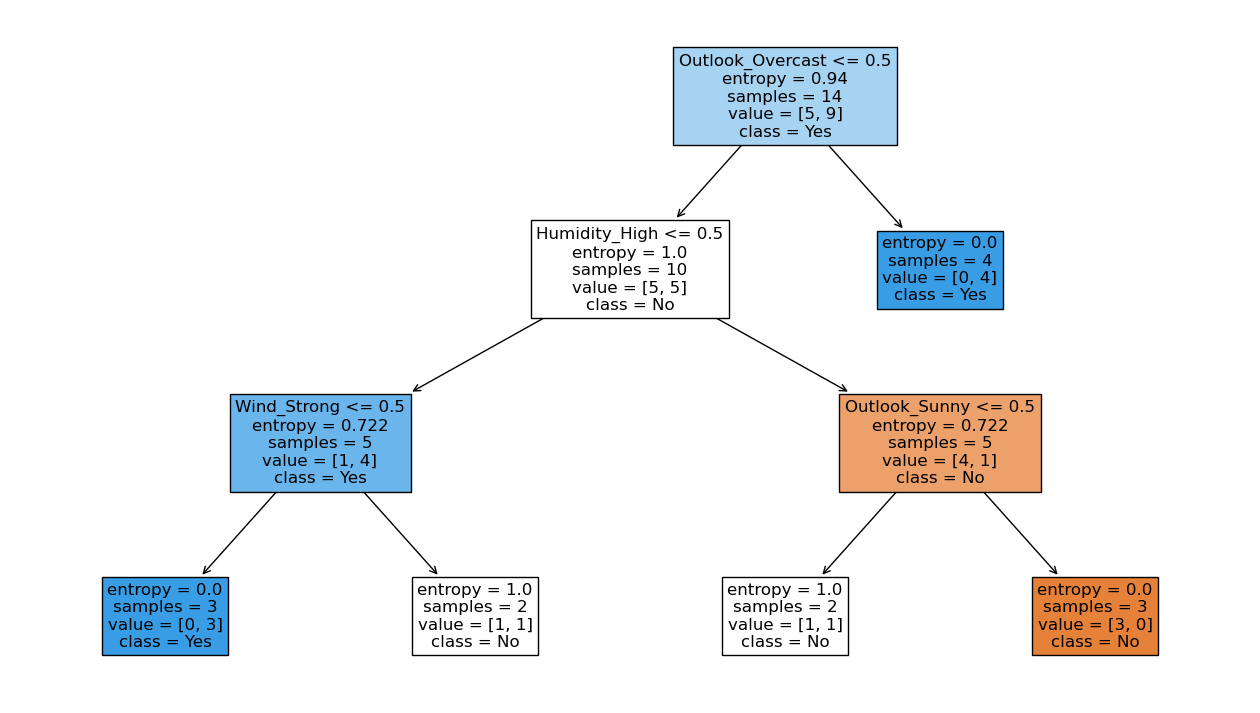

In [ ]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(X, y)
fig = plt.figure(figsize=(16, 9))
a = plot_tree(dtree, feature_names=list(X.columns), filled=True, fontsize=12, class_names=['No', 'Yes'])

# Perceptron

In [ ]:
import numpy as np
def perceptron(input_data, wts):
    x = np.dot(input_data, wts)
    return step(x)
def step(x):
    return 1 if x>0 else 0
input_data = np.array([1, 0.5])
wts = np.array([2, -1])
perceptron(input_data, wts)

1

# Syllabus

1. The probability that it is Friday and that a student is absent is 3 %. Since there are 5 school days in a
week, the probability that it is Friday is 20 %. What is the probability that a student is absent given
that today is Friday? Apply Baye’s rule in python to get the result. (Ans: 15%)

In [ ]:
def bayes(pB, pAandB):
  return pAandB / pB

prob = {'B': 0.2, 'AandB': 0.03}
bayes(prob['B'], prob['AandB'])*100

15.0

2.The following training examples map descriptions of individuals onto high, medium and low credit-worthiness. The following training examples map descriptions of individuals onto high, medium and low credit-
worthiness.

In [ ]:
df = pd.read_csv('question2.csv')
df

,income,recreation,job,status,age-group,home-owner,credit
0,medium,skiing,design,single,twenties,no,highRisk
1,high,golf,trading,married,forties,yes,lowRisk
2,low,speedway,transport,married,thirties,yes,medRisk
3,medium,football,banking,single,thirties,yes,lowRisk
4,high,flying,media,married,fifties,yes,highRisk
5,low,football,security,single,twenties,no,medRisk
6,medium,golf,media,single,thirties,yes,medRisk
7,medium,golf,transport,married,forties,yes,lowRisk
8,high,skiing,banking,single,thirties,yes,highRisk
9,low,golf,unemployed,married,forties,yes,highRisk


In [ ]:
def prob(x: int, n: int) -> float:
  return round(x/n, 3)

In [ ]:
total = df.shape[0]
golfCount = df.recreation[df.recreation == 'golf'].count()
prob(golfCount, total)

0.4

In [ ]:
sm = len(df[(df['credit'] == 'medRisk') & (df['status'] == 'single')])
s = len(df[df['credit'] == 'medRisk'])
prob(sm,s)

0.667